In [72]:
import pandas as pd

1) Đọc dữ liệu đã được tiền xử lý trước đó. Bỏ đi thuộc tính Subject.

In [73]:
data = pd.read_csv('tidy_data.csv', sep='\t')
data

,Subject,Activity,"TimeBodyAcceleration,mean value,X","TimeBodyAcceleration,mean value,Y","TimeBodyAcceleration,mean value,Z","TimeBodyAcceleration,standard deviation value,X","TimeBodyAcceleration,standard deviation value,Y","TimeBodyAcceleration,standard deviation value,Z","TimeGravityAcceleration,mean value,X","TimeGravityAcceleration,mean value,Y",...,"FrequencyBodyAccelerationMagnitude,meanFreq()","FrequencyBodyBodyacceleration jerkMagnitude,mean value","FrequencyBodyBodyacceleration jerkMagnitude,standard deviation value","FrequencyBodyBodyacceleration jerkMagnitude,meanFreq()","FrequencyBodyBodyangular velocityMagnitude,mean value","FrequencyBodyBodyangular velocityMagnitude,standard deviation value","FrequencyBodyBodyangular velocityMagnitude,meanFreq()","FrequencyBodyBodyangular velocity jerkMagnitude,mean value","FrequencyBodyBodyangular velocity jerkMagnitude,standard deviation value","FrequencyBodyBodyangular velocity jerkMagnitude,meanFreq()"
0,1,WALKING,0.277331,-0.017384,-0.111148,-0.283740,0.114461,-0.260028,0.935223,-0.282165,...,0.190644,-0.057119,-0.103492,0.093822,-0.199253,-0.321018,0.268844,-0.319309,-0.381602,0.190663
1,1,WALKING_UPSTAIRS,0.255462,-0.023953,-0.097302,-0.354708,-0.002320,-0.019479,0.893351,-0.362153,...,-0.097743,-0.442652,-0.533060,0.085352,-0.325961,-0.182986,-0.219303,-0.634665,-0.693931,0.114277
2,1,WALKING_DOWNSTAIRS,0.289188,-0.009919,-0.107566,0.030035,-0.031936,-0.230434,0.931874,-0.266610,...,0.119187,0.026218,-0.104052,0.076492,-0.185720,-0.398350,0.349614,-0.281963,-0.391920,0.190001
3,1,SITTING,0.261238,-0.001308,-0.104544,-0.977229,-0.922619,-0.939586,0.831510,0.204412,...,0.236655,-0.985262,-0.981606,0.351852,-0.958436,-0.932198,-0.000262,-0.989798,-0.987050,0.184776
4,1,STANDING,0.278918,-0.016138,-0.110602,-0.995760,-0.973190,-0.979776,0.942952,-0.272984,...,0.284555,-0.992542,-0.992536,0.422220,-0.984618,-0.978466,-0.028606,-0.994815,-0.994671,0.334499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,30,WALKING_UPSTAIRS,0.271416,-0.025331,-0.124697,-0.350504,-0.127311,0.024947,0.931830,-0.226647,...,-0.312338,-0.549785,-0.580878,-0.048476,-0.449151,-0.151472,-0.456639,-0.773974,-0.791349,-0.071440
176,30,WALKING_DOWNSTAIRS,0.283191,-0.017438,-0.099978,-0.057770,-0.027263,-0.217276,0.958000,-0.126710,...,-0.072483,-0.125961,-0.133124,-0.125210,-0.356772,-0.252362,-0.175931,-0.617579,-0.645504,0.022716
177,30,SITTING,0.268336,-0.008047,-0.099515,-0.983623,-0.937857,-0.950654,0.825474,0.114588,...,0.070594,-0.985826,-0.985295,0.318769,-0.973876,-0.959514,-0.146609,-0.991751,-0.990946,0.216651
178,30,STANDING,0.277113,-0.017016,-0.108756,-0.977559,-0.891655,-0.912851,0.968557,-0.100297,...,-0.111500,-0.953358,-0.946640,0.049475,-0.917449,-0.888872,-0.318309,-0.959242,-0.955009,-0.131721


In [74]:
data.drop(columns="Subject", inplace=True)

In [75]:
data

,Activity,"TimeBodyAcceleration,mean value,X","TimeBodyAcceleration,mean value,Y","TimeBodyAcceleration,mean value,Z","TimeBodyAcceleration,standard deviation value,X","TimeBodyAcceleration,standard deviation value,Y","TimeBodyAcceleration,standard deviation value,Z","TimeGravityAcceleration,mean value,X","TimeGravityAcceleration,mean value,Y","TimeGravityAcceleration,mean value,Z",...,"FrequencyBodyAccelerationMagnitude,meanFreq()","FrequencyBodyBodyacceleration jerkMagnitude,mean value","FrequencyBodyBodyacceleration jerkMagnitude,standard deviation value","FrequencyBodyBodyacceleration jerkMagnitude,meanFreq()","FrequencyBodyBodyangular velocityMagnitude,mean value","FrequencyBodyBodyangular velocityMagnitude,standard deviation value","FrequencyBodyBodyangular velocityMagnitude,meanFreq()","FrequencyBodyBodyangular velocity jerkMagnitude,mean value","FrequencyBodyBodyangular velocity jerkMagnitude,standard deviation value","FrequencyBodyBodyangular velocity jerkMagnitude,meanFreq()"
0,WALKING,0.277331,-0.017384,-0.111148,-0.283740,0.114461,-0.260028,0.935223,-0.282165,-0.068103,...,0.190644,-0.057119,-0.103492,0.093822,-0.199253,-0.321018,0.268844,-0.319309,-0.381602,0.190663
1,WALKING_UPSTAIRS,0.255462,-0.023953,-0.097302,-0.354708,-0.002320,-0.019479,0.893351,-0.362153,-0.075403,...,-0.097743,-0.442652,-0.533060,0.085352,-0.325961,-0.182986,-0.219303,-0.634665,-0.693931,0.114277
2,WALKING_DOWNSTAIRS,0.289188,-0.009919,-0.107566,0.030035,-0.031936,-0.230434,0.931874,-0.266610,-0.062120,...,0.119187,0.026218,-0.104052,0.076492,-0.185720,-0.398350,0.349614,-0.281963,-0.391920,0.190001
3,SITTING,0.261238,-0.001308,-0.104544,-0.977229,-0.922619,-0.939586,0.831510,0.204412,0.332044,...,0.236655,-0.985262,-0.981606,0.351852,-0.958436,-0.932198,-0.000262,-0.989798,-0.987050,0.184776
4,STANDING,0.278918,-0.016138,-0.110602,-0.995760,-0.973190,-0.979776,0.942952,-0.272984,0.013491,...,0.284555,-0.992542,-0.992536,0.422220,-0.984618,-0.978466,-0.028606,-0.994815,-0.994671,0.334499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,WALKING_UPSTAIRS,0.271416,-0.025331,-0.124697,-0.350504,-0.127311,0.024947,0.931830,-0.226647,-0.022140,...,-0.312338,-0.549785,-0.580878,-0.048476,-0.449151,-0.151472,-0.456639,-0.773974,-0.791349,-0.071440
176,WALKING_DOWNSTAIRS,0.283191,-0.017438,-0.099978,-0.057770,-0.027263,-0.217276,0.958000,-0.126710,0.028808,...,-0.072483,-0.125961,-0.133124,-0.125210,-0.356772,-0.252362,-0.175931,-0.617579,-0.645504,0.022716
177,SITTING,0.268336,-0.008047,-0.099515,-0.983623,-0.937857,-0.950654,0.825474,0.114588,0.344766,...,0.070594,-0.985826,-0.985295,0.318769,-0.973876,-0.959514,-0.146609,-0.991751,-0.990946,0.216651
178,STANDING,0.277113,-0.017016,-0.108756,-0.977559,-0.891655,-0.912851,0.968557,-0.100297,0.024304,...,-0.111500,-0.953358,-0.946640,0.049475,-0.917449,-0.888872,-0.318309,-0.959242,-0.955009,-0.131721


2) Thống kê số lượng nhãn, số lượng thuộc tính và phân bố dữ liệu theo nhãn.

In [76]:
label_col = 'Activity'

In [77]:
num_samples = data.shape[0]  # Số lượng mẫu
num_features = data.shape[1] - 1  # Trừ cột nhãn
num_classes = data[label_col].nunique()
label_distribution = data[label_col].value_counts()

In [78]:
num_features, num_classes, label_distribution

(79,
 6,
 Activity
 WALKING               30
 WALKING_UPSTAIRS      30
 WALKING_DOWNSTAIRS    30
 SITTING               30
 STANDING              30
 LAYING                30
 Name: count, dtype: int64)

3) Chuẩn bị dữ liệu: phân chia dữ liệu ban đầu thành 2 tập: huấn luyện (train) và kiểm thử (test) với tỉ lệ 8-2.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [80]:
X = data.drop(columns=label_col)
y = data[label_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Cài đặt mô hình: kNN và SVM. Sử dụng kỹ thuật cross validation.
5) Đánh giá mô hình: Độ chính xác (Accuracy) Ma trận nhầm lẫn (Confusion matrix)

[CV] kNN Accuracy trung bình (cv=5): 0.8958
[CV] SVM Accuracy trung bình (cv=5): 0.7781
[Test] kNN Accuracy: 0.9167
[Test] SVM Accuracy: 0.7778
Confusion Matrix - kNN:


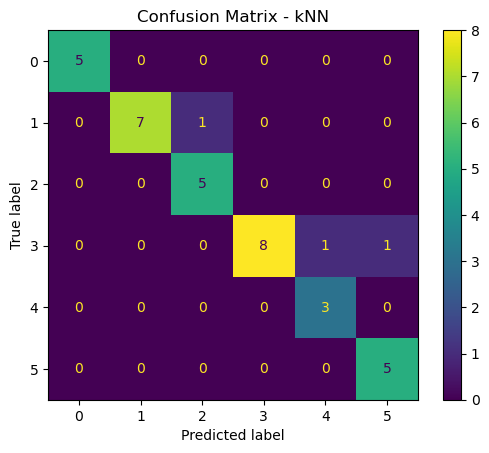

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         5
           SITTING       1.00      0.88      0.93         8
          STANDING       0.83      1.00      0.91         5
           WALKING       1.00      0.80      0.89        10
WALKING_DOWNSTAIRS       0.75      1.00      0.86         3
  WALKING_UPSTAIRS       0.83      1.00      0.91         5

          accuracy                           0.92        36
         macro avg       0.90      0.95      0.92        36
      weighted avg       0.93      0.92      0.92        36

Confusion Matrix - SVM:


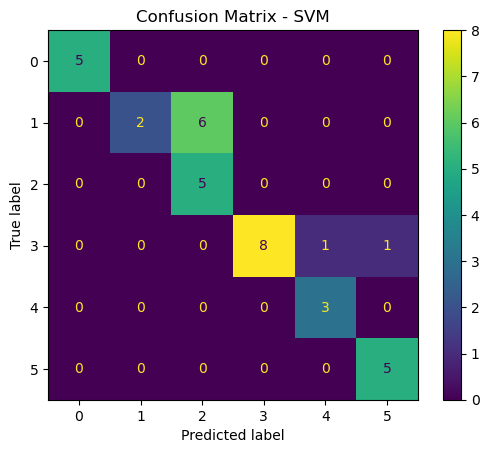

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         5
           SITTING       1.00      0.25      0.40         8
          STANDING       0.45      1.00      0.62         5
           WALKING       1.00      0.80      0.89        10
WALKING_DOWNSTAIRS       0.75      1.00      0.86         3
  WALKING_UPSTAIRS       0.83      1.00      0.91         5

          accuracy                           0.78        36
         macro avg       0.84      0.84      0.78        36
      weighted avg       0.88      0.78      0.76        36



In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Khởi tạo mô hình ---
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1, gamma='scale')

cv = 5  # Số lượng folds

# --- Cross-validation ---
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=cv)
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=cv)

print(f"[CV] kNN Accuracy trung bình (cv={cv}): {knn_cv_scores.mean():.4f}")
print(f"[CV] SVM Accuracy trung bình (cv={cv}): {svm_cv_scores.mean():.4f}")

# --- Huấn luyện mô hình với toàn bộ tập train ---
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# --- Dự đoán ---
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

# --- Độ chính xác trên tập test ---
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"[Test] kNN Accuracy: {acc_knn:.4f}")
print(f"[Test] SVM Accuracy: {acc_svm:.4f}")

# --- Ma trận nhầm lẫn ---
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)

print("Confusion Matrix - kNN:")
disp_knn.plot()
plt.title("Confusion Matrix - kNN")
plt.show()
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix - SVM:")
disp_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.show()
print(classification_report(y_test, y_pred_svm))

6) Có nhận xét gì về hiệu quả giữa 2 mô hình?

kNN đạt accuracy = 0.92, trong khi SVM chỉ đạt accuracy = 0.78.

***Hiệu quả dự đoán trên từng nhãn***

Với kNN:

Các nhãn như LAYING, SITTING, WALKING: đều có Precision, Recall, F1-score = 1.00 → hiệu quả dự đoán rất tốt.

Các nhãn còn lại (WALKING_DOWNSTAIRS, WALKING_UPSTAIRS) cũng có F1 cao (> 0.85).

Với SVM:

LAYING vẫn được dự đoán tốt (F1 = 1.00).

Nhưng SITTING chỉ đạt Recall = 0.25, F1 = 0.40 → rất kém.

STANDING cũng chỉ đạt F1 = 0.62.

***Nhãn nào dự đoán tốt nhất, kém nhất***

| Nhãn                     | Dự đoán tốt nhất             | Lý do                                                 |
| ------------------------ | ---------------------------- | ----------------------------------------------------- |
| **LAYING**               | Ở cả kNN và SVM (F1 = 1.00)  | Vì đây là trạng thái ít chuyển động, dễ phân biệt     |
| **SITTING** (trong SVM)  | Dự đoán kém nhất (F1 = 0.40) | Dễ nhầm với `STANDING` do đặc trưng tín hiệu tương tự |
| **STANDING** (trong SVM) | Cũng không tốt (F1 = 0.62)   | Do dễ nhầm lẫn với `SITTING`                          |

***Tỉ lệ nhầm lẫn cao nhất***

Từ ma trận nhầm lẫn của SVM, SITTING có Recall = 0.25, nghĩa là 75% bị nhầm sang lớp khác → tỉ lệ nhầm lẫn cao nhất.

Các mẫu SITTING có thể đã bị gán nhầm thành STANDING hoặc thậm chí LAYING.

**Mô hình kNN vượt trội hơn rõ rệt về độ chính xác tổng thể. Điều này có thể do kNN linh hoạt hơn trong việc xử lý dữ liệu có ranh giới phức tạp, trong khi SVM dễ bị ảnh hưởng nếu các lớp không tách biệt tốt tuyến tính, sự mất cân bằng trong khả năng phân biệt nhãn, đặc biệt là ở các hoạt động tĩnh.**(Các hoạt động tĩnh có ít chuyển động, tín hiệu từ cảm biến (như accelerometer hoặc gyroscope) có biên độ thấp, dễ bị nhầm nếu không có phân tích chi tiết về tư thế.)

7) Cài đặt thêm 2 thuật toán: Linear Discriminant Analysis (LDA) và Random Forest (RF). So sánh kết quả giữa 4 mô hình với nhau.

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [93]:
lda = LinearDiscriminantAnalysis()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [94]:
# LDA
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# RF
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [96]:
print("Confusion Matrix - LDA:")
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

Confusion Matrix - LDA:
[[ 5  0  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  5]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         5
           SITTING       1.00      0.88      0.93         8
          STANDING       0.83      1.00      0.91         5
           WALKING       1.00      1.00      1.00        10
WALKING_DOWNSTAIRS       1.00      1.00      1.00         3
  WALKING_UPSTAIRS       1.00      1.00      1.00         5

          accuracy                           0.97        36
         macro avg       0.97      0.98      0.97        36
      weighted avg       0.98      0.97      0.97        36



In [97]:
print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Confusion Matrix - Random Forest:
[[5 0 0 0 0 0]
 [0 7 1 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 9 0 1]
 [0 0 0 0 3 0]
 [0 0 0 0 0 5]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         5
           SITTING       1.00      0.88      0.93         8
          STANDING       0.83      1.00      0.91         5
           WALKING       1.00      0.90      0.95        10
WALKING_DOWNSTAIRS       1.00      1.00      1.00         3
  WALKING_UPSTAIRS       0.83      1.00      0.91         5

          accuracy                           0.94        36
         macro avg       0.94      0.96      0.95        36
      weighted avg       0.95      0.94      0.95        36



In [98]:
import numpy as np

# Danh sách để lưu Accuracy
knn_accuracies = []
svm_accuracies = []
lda_accuracies = []
rf_accuracies = []

# Thực hiện 5 lần với các seed khác nhau
for seed in [42, 7, 123, 2023, 99]:
    # Bước 1-2: Chia dữ liệu (giữ nguyên X, y từ preprocessing trước đó)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Bước 3: Tạo mô hình
    knn = KNeighborsClassifier(n_neighbors=3)
    svm = SVC(kernel='linear')
    lda = LinearDiscriminantAnalysis()
    rf = RandomForestClassifier(n_estimators=100, random_state=seed)

    # Bước 4: Huấn luyện mô hình
    knn.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    lda.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Bước 5: Dự đoán
    y_pred_knn = knn.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_lda = lda.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    # Bước 6: Accuracy
    acc_knn = accuracy_score(y_test, y_pred_knn)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    acc_lda = accuracy_score(y_test, y_pred_lda)
    acc_rf = accuracy_score(y_test, y_pred_rf)

    # Lưu lại kết quả
    knn_accuracies.append(acc_knn)
    svm_accuracies.append(acc_svm)
    lda_accuracies.append(acc_lda)
    rf_accuracies.append(acc_rf)

    # In kết quả từng lần
    print(f"Seed {seed} - kNN Accuracy: {acc_knn:.4f} | SVM Accuracy: {acc_svm:.4f} | LDA Accuracy: {acc_lda:.4f} | RF Accuracy: {acc_rf:.4f}")

# Bước 7: Tính độ chính xác trung bình
avg_knn = np.mean(knn_accuracies)
avg_svm = np.mean(svm_accuracies)
avg_lda = np.mean(lda_accuracies)
avg_rf = np.mean(rf_accuracies)

print("\n==============================")
print(f"Trung bình Accuracy kNN: {avg_knn:.4f}")
print(f"Trung bình Accuracy SVM: {avg_svm:.4f}")
print(f"Trung bình Accuracy LDA: {avg_lda:.4f}")
print(f"Trung bình Accuracy RF: {avg_rf:.4f}")


Seed 42 - kNN Accuracy: 0.9167 | SVM Accuracy: 0.9444 | LDA Accuracy: 0.9722 | RF Accuracy: 0.9444
Seed 7 - kNN Accuracy: 0.9167 | SVM Accuracy: 0.9444 | LDA Accuracy: 0.9722 | RF Accuracy: 0.9167
Seed 123 - kNN Accuracy: 0.9722 | SVM Accuracy: 0.9722 | LDA Accuracy: 0.9722 | RF Accuracy: 1.0000
Seed 2023 - kNN Accuracy: 0.8889 | SVM Accuracy: 0.9444 | LDA Accuracy: 0.9444 | RF Accuracy: 0.9722
Seed 99 - kNN Accuracy: 0.8333 | SVM Accuracy: 0.9444 | LDA Accuracy: 0.9167 | RF Accuracy: 0.9722

Trung bình Accuracy kNN: 0.9056
Trung bình Accuracy SVM: 0.9500
Trung bình Accuracy LDA: 0.9556
Trung bình Accuracy RF: 0.9611
